# Fontes (biblioteca e links):

https://www.kaggle.com/olistbr/brazilian-ecommerce?select=olist_order_payments_dataset.csv

In [1]:
#!pip install pandas numpy matplotlib seaborn sklearn
# em caso de erro na importação do seaborn use -> %pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta, datetime
import os
sns.set()

from IPython.display import display
from IPython.display import Image
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_columns', None)
%matplotlib inline

# Estrutura dos dados:

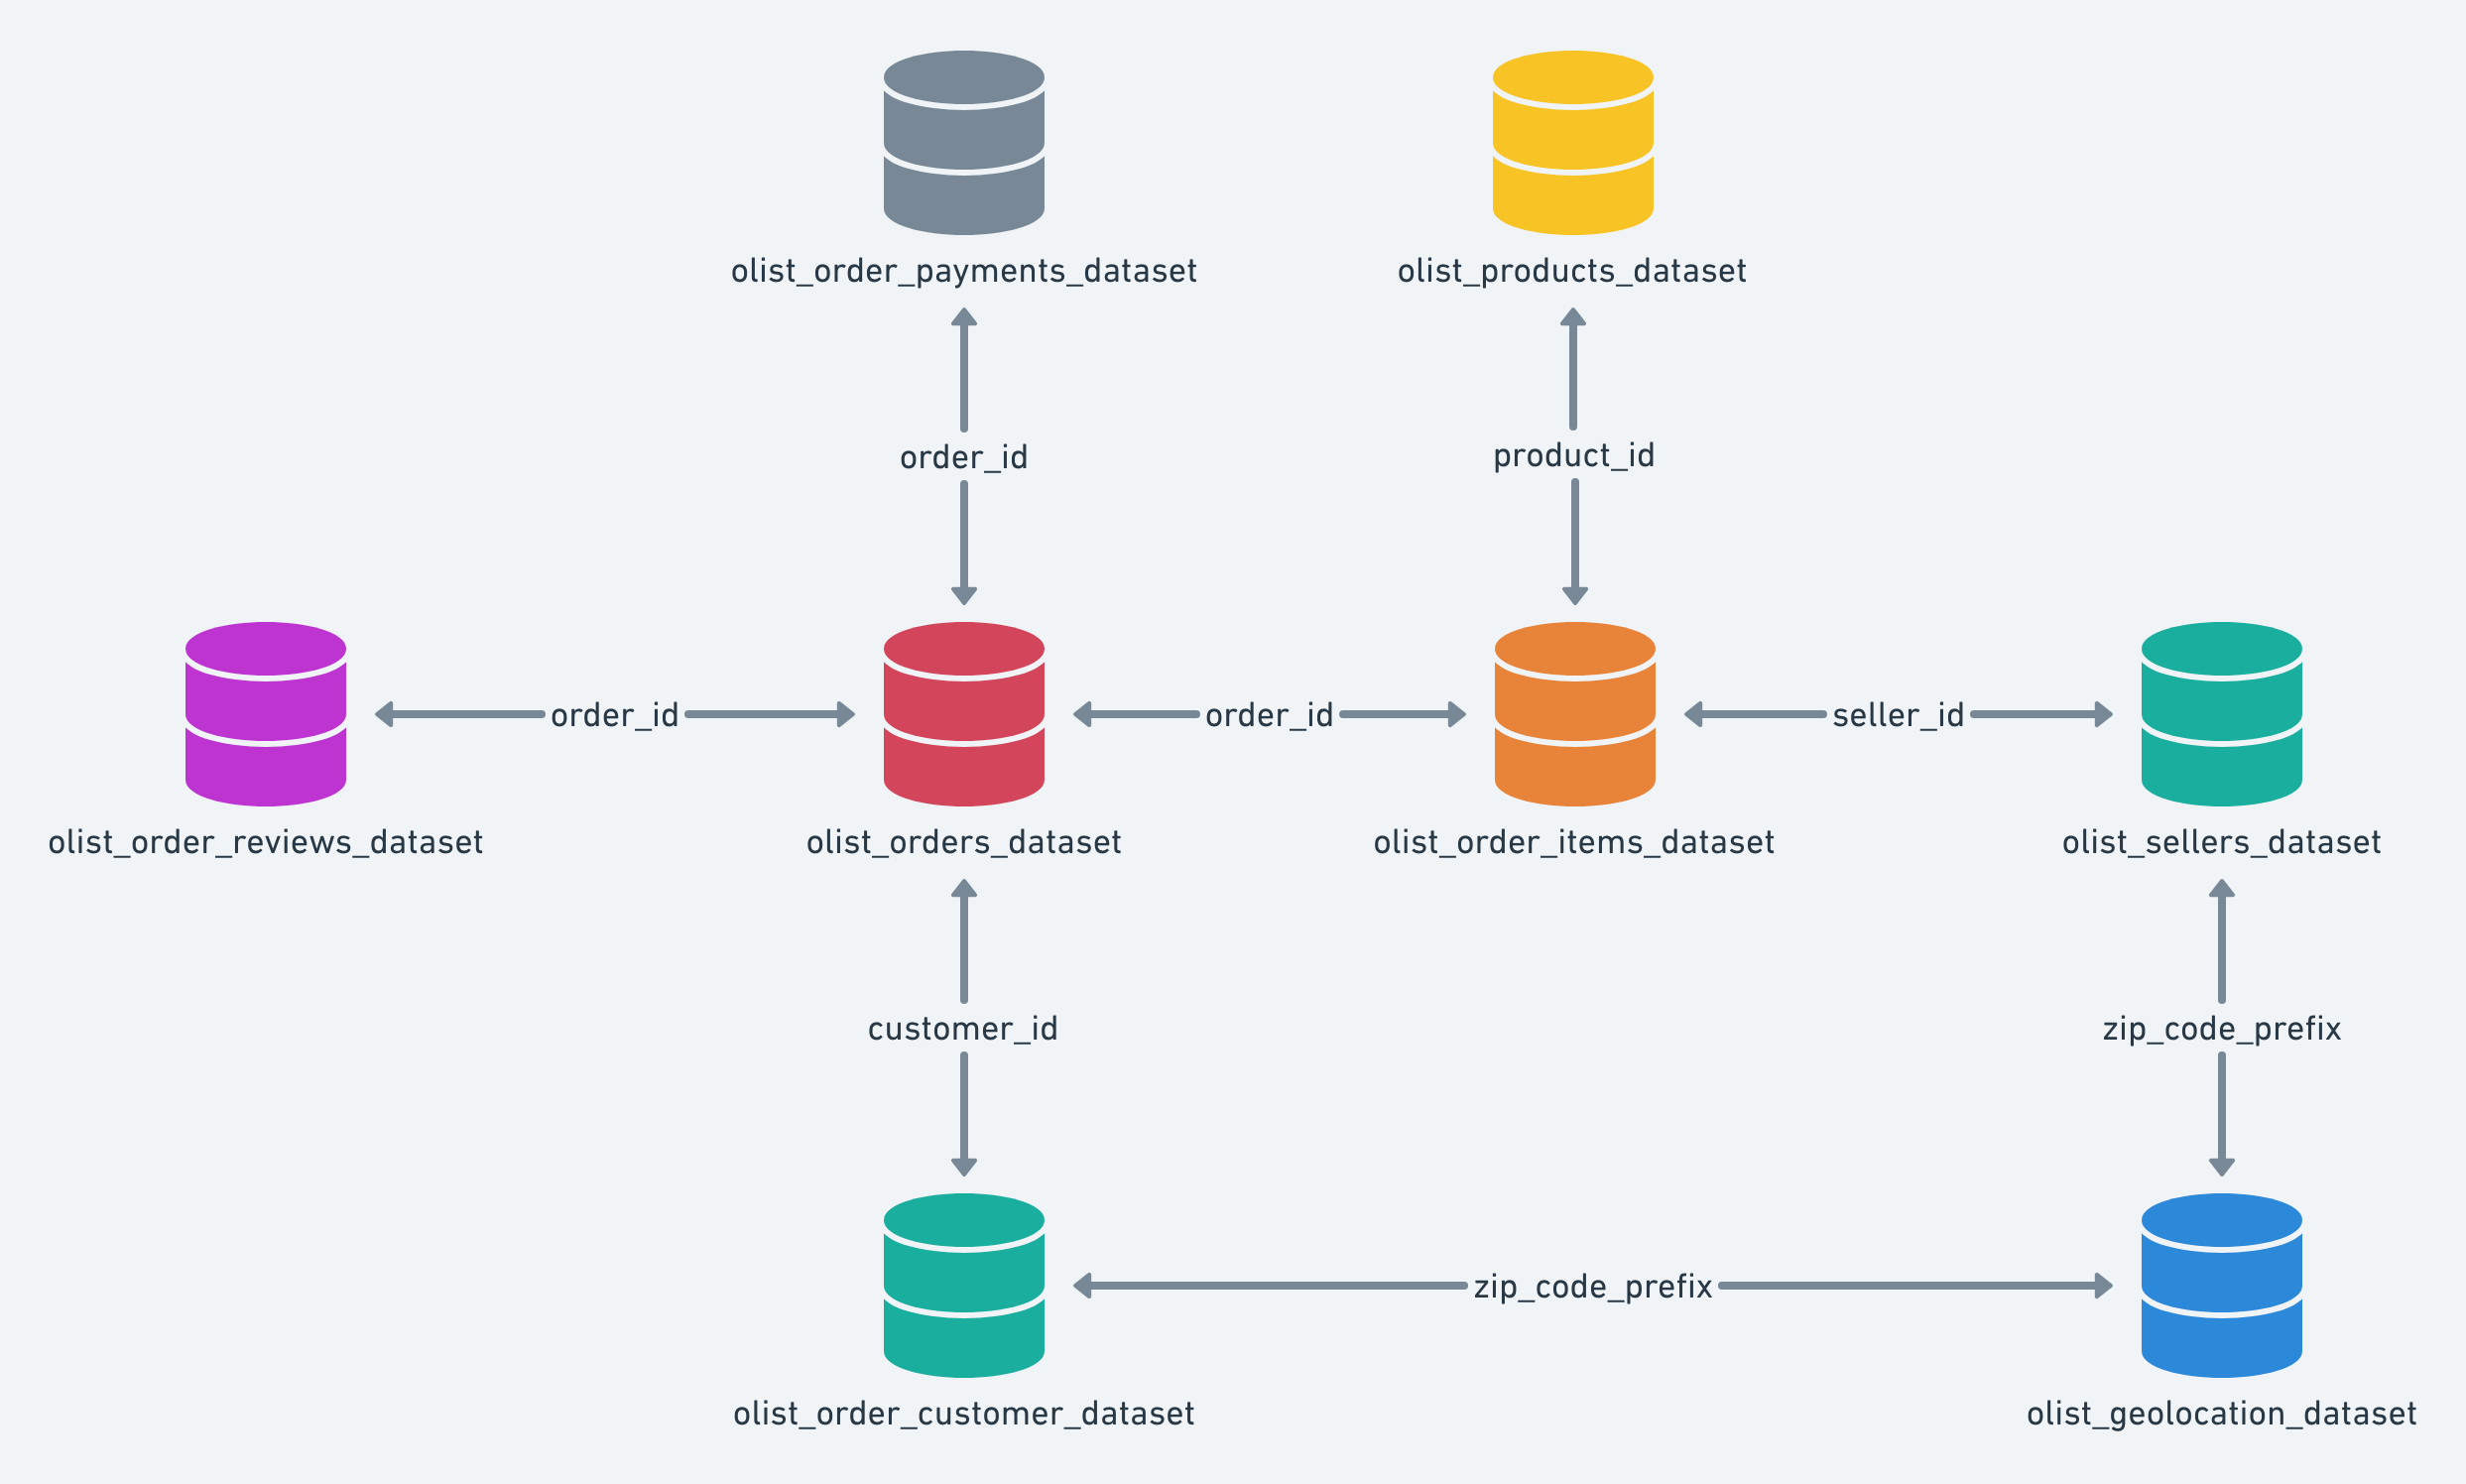

In [3]:
Image('https://i.imgur.com/HRhd2Y0.png', width=700)

## Informações sobre dataset:


#### customer_id::

chave para o conjunto de dados de pedidos. Cada pedido tem um customer_id exclusivo.

#### customer_unique_id:

identificador único de um cliente.

#### customer_zip_code_prefix:

primeiros cinco dígitos do código postal do cliente

#### cidade_cliente:

nome da cidade do cliente

#### order_id:

identificador exclusivo do pedido

#### order_item_id:

número seqüencial que identifica o número de itens incluídos no mesmo pedido.

#### product_id:

identificador exclusivo do produto

#### seller_id:

identificador exclusivo do vendedor

#### shipping_limit_date:

Mostra a data limite de envio do vendedor para processar o pedido ao parceiro logístico.

#### price:

item de preço

#### freight_value;

valor do frete item (se um pedido tiver mais de um item o valor do frete é dividido entre os itens)

#### payment_sequential:

um cliente pode pagar um pedido com mais de um método de pagamento. Se ele fizer isso, uma sequência será criada para

#### payment_type:

forma de pagamento escolhida pelo cliente.

#### payment_installments:

número de parcelas escolhido pelo cliente.

#### review_score:

Nota que varia de 1 a 5 dada pelo cliente em uma pesquisa de satisfação.

#### review_comment_title:

Título do comentário da avaliação deixada pelo cliente, em português.

#### review_comment_message:

Mensagem de comentário da avaliação deixada pelo cliente, em português.

#### review_creation_date:

Mostra a data em que a pesquisa de satisfação foi enviada ao cliente.

#### review_answer_timestamp:

Mostra o timestamp de resposta da pesquisa de satisfação.

#### customer_id:

chave para o conjunto de dados do cliente. Cada pedido tem um customer_id exclusivo.

#### order_status:

Referência ao status do pedido (entregue, enviado, etc).

#### order_purchase_timestamp:

Mostra o carimbo de data/hora da compra.

#### order_approved_at:

Mostra o carimbo de data/hora de aprovação do pagamento.

#### order_delivered_carrier_date:

Mostra o carimbo de data/hora de lançamento do pedido. Quando foi tratado para o parceiro logístico.

#### order_delivered_customer_date:

Mostra a data real de entrega do pedido ao cliente.

#### order_estimated_delivery_date:

Mostra a data estimada de entrega que foi informada ao cliente no momento da compra.

#### product_name_lenght:

número de caracteres extraídos do nome do produto.

#### product_description_lenght:

número de caracteres extraídos da descrição do produto.

#### product_photos_qty:

número de fotos publicadas do produto

#### product_weight_g:

peso do produto medido em gramas.

#### product_length_cm:

comprimento do produto medido em centímetros.

#### product_height_cm:

altura do produto medida em centímetros.

#### product_width_cm:

largura do produto medida em centímetros.

### Atenção:

1. Um pedido pode ter vários itens.
2. Cada item pode ser entregue por um vendedor distinto.

### Anotações:

1.
A Olist é uma loja de departamentos (marketplace) brasileira que atua no segmento de e-commerce, mas não é um e-commerce em si. Atua como uma empresa de tecnologia SaaS (Software as a Service) desde 2015. Oferece uma solução de marketplace (do segmento de e-commerce) para lojistas de todos os portes (e para a maioria dos segmentos) para aumentar suas vendas com presença online ou não .

2.
A solução da Olist consiste em três aspectos: Software, Contratos com os principais marketplaces e Compartilhamento de Reputação. O diagrama abaixo mostra como a Olist vincula marketplaces, consumidores e varejistas

3.
Lista:
- … é uma grande loja de departamentos dentro de marketplaces.
- … está conectado aos principais e-commerces do Brasil.
- … não compra produtos.
- … não mantém produtos em estoque.
- … não realiza o envio de nenhum produto oferecido em sua loja.
- Todos os produtos são vendidos e enviados pelos milhares de lojistas (cadastrados na Olist*) que vendem através da Olist.
- Sua força está na união de todos os lojistas participantes, que estão vendendo produtos físicos.
- O lojista participante é responsável por separar, embalar e levar os produtos até o operador logístico.

## Desafio:
- Modelo de machine learning que agrupe clientes como: ouro, prata e bronze
- Features usadas: receita média, quantidade de pedidos, retenção, recência

## Passo-a-passo:

Para conseguirmos variáveis relevantes para elaborar nosso modelo primeiro devemos tratar nossos dados para que obtenhamos uma estrutura organizada e o menos defeituosa possível para extrair as informações que precisamos. Iniciaremos este processo com as seguintes estapas:
- Reunir os dados brutos através das chaves que os conectam ("primary keys" e "foreign keys" como no contexto de banco de dados).
- Tratar os tipos de dados incorretos
- Tratar os dados nulos
- Fazer a seleção ou "criação" das variáveis necessárias através do feature selection
- Criação do modelo a partir dessa reestruturação dos dados, formulando assim nossa variável explicada e nossas variáveis explicativas 

# Observando estrutura dos arquivos:

In [4]:
import pathlib
x = tuple(pathlib.Path('.').rglob('olistcsv/*.csv'))
for i, each in enumerate(x): 
    print(i, each, sep='\n')
    v = pd.read_csv(x[i])
    print(tuple(v.columns))
    print(f'{v.shape[0]} lines', f'{v.shape[1]} columns\n')

0
olistcsv/olist_order_items_dataset.csv
('order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value')
112650 lines 7 columns

1
olistcsv/olist_geolocation_dataset.csv
('geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state')
1000163 lines 5 columns

2
olistcsv/olist_order_payments_dataset.csv
('order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value')
103886 lines 5 columns

3
olistcsv/olist_sellers_dataset.csv
('seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state')
3095 lines 4 columns

4
olistcsv/product_category_name_translation.csv
('product_category_name', 'product_category_name_english')
71 lines 2 columns

5
olistcsv/olist_customers_dataset.csv
('customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state')
99441 lines 5 columns

6
olistcsv/olist_orders_dataset.csv
('order_id', 'customer_id', 'order_

# Raw datasets (extração bruta):

### Anotações sobre os arquivos e colunas importantes:
**olistcsv/olist_order_items_dataset.csv ->**
o preço do produto é preço + frete
order_id, product_id

**olistcsv/olist_order_payments_dataset.csv ->**
order_id, payment_sequential, payment_type, payment_installments, payment_value

**olistcsv/olist_customers_dataset.csv -> informações sobre o cliente**
customer_id, customer_unique_id

**olistcsv/olist_order_reviews_dataset.csv ->**
order_id, review_id, review_score, review_comment_message

**time notes ->**
considerar compra por tempo, quantidade, compra média no tempo, primeira e última compra

### Lendo dados brutos:

In [5]:
# ADICIONAR ETAPA DO MinIO

raw_price_freight = pd.read_csv('./olistcsv/olist_order_items_dataset.csv')
raw_payment = pd.read_csv('./olistcsv/olist_order_payments_dataset.csv')
raw_client_review = pd.read_csv('./olistcsv/olist_order_reviews_dataset.csv')
raw_orders_central = pd.read_csv('./olistcsv/olist_orders_dataset.csv')
raw_costumer = pd.read_csv('./olistcsv/olist_customers_dataset.csv')

### Unindos as tabelas e descrevendo "shape" e colunas:

raw_orders_central # Tabela dimensão -> 'order_id', 'customer_id'

raw_costumer # Tabela dimensão -> 'customer_id', 'customer_unique_id'

raw_price_freight # Tabela fato

raw_payment # Tabela fato

raw_client_review # Tabela fato

In [6]:
# Formação de tabelas e seus vínculos explicativos

df1 = pd.merge(left=raw_orders_central, right=raw_costumer, on='customer_id', how='outer')
price_freight = pd.merge(left=raw_price_freight, right=df1, on='order_id', how='left')
payment = pd.merge(left=raw_payment, right=df1, on='order_id', how='left')
client_review = pd.merge(left=raw_client_review, right=df1, on='order_id', how='left')

In [7]:
del raw_client_review, raw_costumer, raw_orders_central, raw_payment, raw_price_freight

## Uma investigação sobre a organização dos dados:

Queremos entender se **payment_value** representa a soma da coluna **price** e da coluna **freight_value**

1. Primeiramente usaremos os clientes com maior diversidade em seus pedidos:

In [8]:
display(price_freight[['customer_id', 'order_id']].value_counts().head(2))
display(price_freight[['customer_id', 'order_id']].value_counts().tail(1))

display(payment[['customer_id', 'order_id']].value_counts().head(2))
display(payment[['customer_id', 'order_id']].value_counts().tail(2))

customer_id                       order_id                        
fc3d1daec319d62d49bfb5e1f83123e9  8272b63d03f5f79c56e9e4120aec44ef    21
be1b70680b9f9694d8c70f41fa3dc92b  1b15974a0141d54e36626dca3fdc731a    20
dtype: int64

customer_id                       order_id                        
800512d0215633d567abe5ce2591f01d  971602526032659f775bbbe5b9142179    1
dtype: int64

customer_id                       order_id                        
9af2372a1e49340278e7c1ef8d749f34  fa65dad1b0e818e3ccc5cb0e39231352    29
92cd3ec6e2d643d4ebd0e3d6238f69e2  ccf804e764ed5650cd8759557269dc13    26
dtype: int64

customer_id                       order_id                        
56f10439f7b396c7c7b5445357c22e9b  4f601391cdfe2a3984a4b1680c2c3d9a    1
ffffe8b65bbe3087b653a978c870db99  2e935fa1d39497aa0ec3f1107fbfb5b8    1
dtype: int64

->

2. Agora usaremos eles como nossas variáveis de comparação:

**8272b63d03f5f79c56e9e4120aec44ef**, 

**1b15974a0141d54e36626dca3fdc731a**, 

**fa65dad1b0e818e3ccc5cb0e39231352**, 

**ccf804e764ed5650cd8759557269dc13**, 

**971602526032659f775bbbe5b9142179**,

**4f601391cdfe2a3984a4b1680c2c3d9a**

In [9]:
def comparar_pedidos(df1, df2, cod_pedido):
    d1 = df1[df1['order_id'] == cod_pedido]
    d2 = df2[df2['order_id'] == cod_pedido]
    d1.columns = d2.columns = ['order_id', 'result']
    print(f'{d1["result"].to_numpy()[0]} == {d1["result"].to_numpy()[0]}')

In [10]:
newdf = price_freight.copy()
newdf['result'] = price_freight.price + price_freight.freight_value

test1 = payment.groupby('order_id', as_index=False).sum()[['order_id', 'payment_value']]
test2 = newdf.groupby('order_id', as_index=False).sum()[['order_id', 'result']]

lista = '8272b63d03f5f79c56e9e4120aec44ef, 1b15974a0141d54e36626dca3fdc731a, fa65dad1b0e818e3ccc5cb0e39231352, ccf804e764ed5650cd8759557269dc13, 971602526032659f775bbbe5b9142179, 4f601391cdfe2a3984a4b1680c2c3d9a'.split(', ')
awnser = np.arange(len(lista))

for order in lista:
    comparar_pedidos(test1, test2, order)

196.11 == 196.11
2202.4 == 2202.4
457.99 == 457.99
62.68 == 62.68
251.64 == 251.64
174.11 == 174.11


Nossa investigação demonstrou que a soma da coluna "price" e "freight_value" agrupada pela colunar "Order_id" é a forma correta de se compreender a coluna "payment_value". Usamos esta investigação para podermos explicitar a igualdade entre as colunas que existem em diferentes tabelas (A tabela price_freight e a payment)

In [11]:
del newdf, test1, test2, lista, awnser

# Tratando os tipos de dados:

In [12]:
def transform(df: pd.DataFrame, colunas: list) -> pd.DataFrame:
    for each in colunas:
        df[each] = pd.to_datetime(df[each], errors='coerce')
    df['customer_zip_code_prefix'].astype('object')

In [13]:
# Tabela client_review
colunas = ('review_creation_date review_answer_timestamp order_purchase_timestamp order_approved_at ' +
'order_delivered_carrier_date order_delivered_customer_date order_estimated_delivery_date').split()

transform(client_review, colunas)


# Tabela payment 
colunas = ('order_purchase_timestamp order_approved_at order_delivered_carrier_date'
          + ' order_delivered_customer_date order_estimated_delivery_date').split()

transform(payment, colunas)


# Tabela price_freight
colunas = ('shipping_limit_date order_purchase_timestamp order_approved_at order_delivered_carrier_date'
          + ' order_delivered_customer_date order_estimated_delivery_date').split()

transform(price_freight, colunas)

In [14]:
del colunas

# Análise dos dados nulos

In [15]:
price_freight.name = 'price_freight'
payment.name = 'payment'
client_review.name = 'client_review'

In [16]:
dados = [price_freight, payment, client_review]

for v in dados:
    print(f'Tabela {v.name.capitalize()}:')
    display(v.isna().sum()[v.isna().sum() > 0])
    print('-'*20, '\n')

Tabela Price_freight:


order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
dtype: int64

-------------------- 

Tabela Payment:


order_approved_at                 175
order_delivered_carrier_date     1888
order_delivered_customer_date    3132
dtype: int64

-------------------- 

Tabela Client_review:


review_comment_title             87656
review_comment_message           58247
order_approved_at                  156
order_delivered_carrier_date      1756
order_delivered_customer_date     2865
dtype: int64

-------------------- 



Considerando que o modelo que será criado agrupara os clientes baseados nas variáveis **receita média**, **quantidade de pedidos**, **retenção** e **recência**, os valores nulos descritos por tabela e por coluna acima não afetam os resultados

# Investigando distribuição e composição dos dados:

In [17]:
num_att1 = price_freight.select_dtypes(include=['int', 'float']).drop(columns=['order_item_id', 'customer_zip_code_prefix'])
num_att2 = payment['payment_value']
num_att3 = client_review['review_score']


p1 = pd.concat([pd.Series(price_freight.price.skew()), pd.Series(price_freight.freight_value.skew())], axis=0, ignore_index=True)
p2 = pd.concat([pd.Series(price_freight.price.kurt()), pd.Series(price_freight.freight_value.kurt())], axis=0, ignore_index=True)
p2.index = p1.index = ['freight_value', 'price']

p = pd.concat([num_att1.describe().T, p1.T, p2.T], axis=1, ignore_index=True)
p.columns = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'skew', 'kurtosis']
p

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
price,112650.0,120.653739,183.633928,0.85,39.90,74.99,134.90,6735.00,5.639870,59.788253
freight_value,112650.0,19.990320,15.806405,0.00,13.08,16.26,21.15,409.68,7.923208,120.828298


Podemos perceber que ambas as distribuições são significativamente dispersas através dos valores do terceiro quartil (coluna "75%") e do valor máximo (coluna "max"). O frete, apesar de ter uma composição muito menos dispersa, possui o mesmo comportamento que o preço em relação ao demonstrado do terceiro ao último quartil.

Observemos agora sua distribuição em um gráfico para observar como se comporta a quantidade de dados em sua estrutura.

<Figure size 1152x576 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='price', ylabel='Density'>

<AxesSubplot:xlabel='price', ylabel='Density'>

Text(6735.0, 0.002, 'Maior valor da coluna "price"')

Text(13664.08, 0.003, 'Maior valor da coluna "payment.payment_value"')

Text(409.68, 0.004, 'Maior valor da coluna "freight_value"')

<AxesSubplot:>

<AxesSubplot:xlabel='freight_value', ylabel='Density'>

Text(409.68, 0.02, 'Maior valor da coluna "freight_value"')

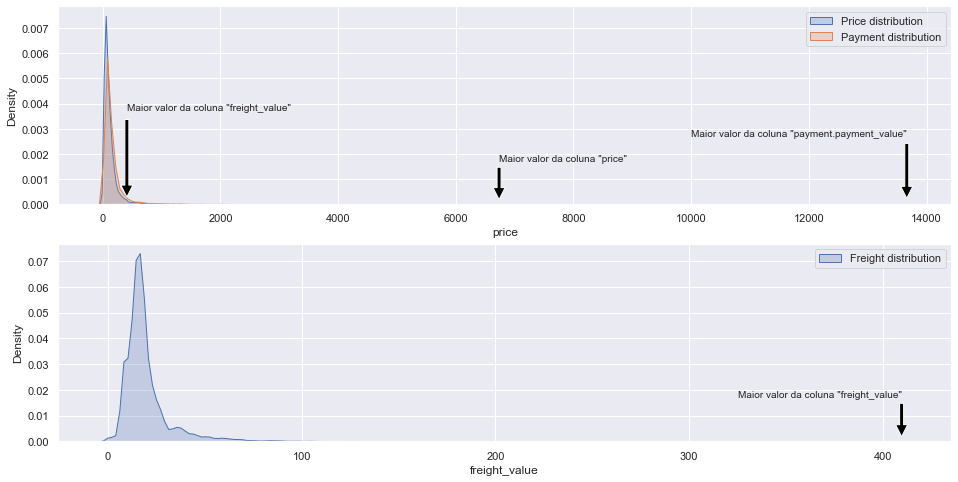

In [18]:
plt.figure(figsize=(16,8))

plt.subplot(2, 1, 1)
sns.kdeplot(price_freight.price, label='Price distribution', shade=True)
sns.kdeplot(payment.payment_value, label='Payment distribution', shade=True)
plt.annotate(
    'Maior valor da coluna "price"',
    (price_freight.price.max(), 0.0001),
    arrowprops=dict(facecolor='black', shrink=0.05),
    xytext=(price_freight.price.max(), 0.002),
    horizontalalignment='left',
    verticalalignment='top'
    )
plt.annotate(
    'Maior valor da coluna "payment.payment_value"',
    (payment.payment_value.max(), 0.0001),
    arrowprops=dict(facecolor='black', shrink=0.05),
    xytext=(payment.payment_value.max(), 0.003),
    horizontalalignment='right',
    verticalalignment='top'
    )
plt.annotate(
    'Maior valor da coluna "freight_value"',
    (price_freight.freight_value.max(), 0.0001),
    arrowprops=dict(facecolor='black', shrink=0.05),
    xytext=(price_freight.freight_value.max(), 0.004),
    horizontalalignment='left',
    verticalalignment='top'
    )
plt.legend(loc='best')

plt.subplot(2, 1, 2)
sns.kdeplot(price_freight.freight_value, label='Freight distribution', shade=True)
plt.annotate(
    'Maior valor da coluna "freight_value"',
    (price_freight.freight_value.max(), 0.001),
    arrowprops=dict(facecolor='black', shrink=0.05),
    xytext=(price_freight.freight_value.max(), 0.02),
    horizontalalignment='right',
    verticalalignment='top'
    )
plt.legend(loc='best')

plt.show()

<Figure size 1152x576 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='price'>

<AxesSubplot:>

<AxesSubplot:xlabel='freight_value'>

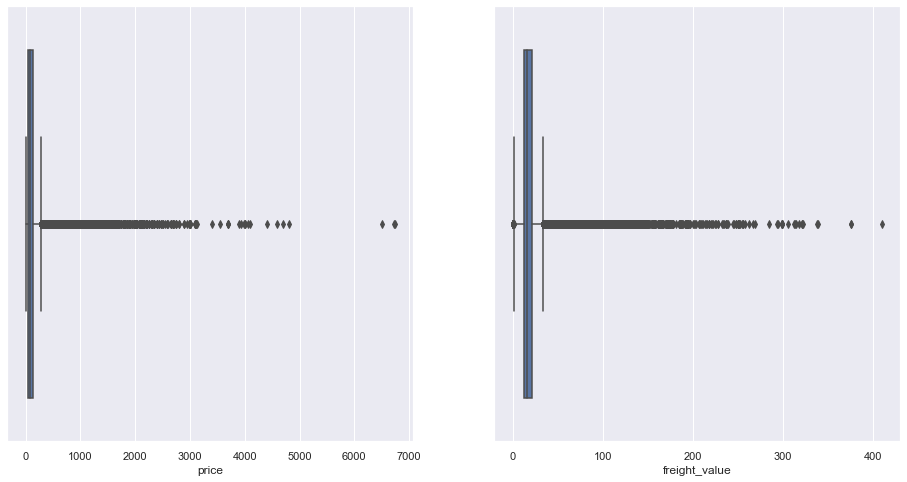

In [19]:
# Plotar boxplot
plt.figure(figsize=(16,8))

for i, cl in enumerate(['price', 'freight_value']):
    plt.subplot(1, 2, i+1)
    sns.boxplot(x=price_freight[cl])

Torna-se possível, agora, perceber visualmente a capacidade de influência dos outliers sobre a estrutura. É importante notar onde está localizada a maior parte dos dados, se nos valores dispersos ou se nos valores concentrados para considerações finais

In [20]:
# Encontrar a contagem (unidades) de cada diferente preço e depois soma-los
p1 = price_freight.price.value_counts()[price_freight.price.value_counts() < 100].sum()
p2 = price_freight.price.value_counts()[price_freight.price.value_counts() > 100].sum()
ptotal = p1 + p2

print(f'Valores abaixo de 100: {p1} unidades', end=' --- ')
print(f'Porcentagem de {p1/ptotal:.2%}')
print()
print(f'Valores acima de 100: {p2} unidades', end=' --- ')
print(f'Porcentagem de {p2/ptotal:.2%}')

Valores abaixo de 100: 39400 unidades --- Porcentagem de 35.04%

Valores acima de 100: 73050 unidades --- Porcentagem de 64.96%


Portanto, a conclusão que podemos tirar desses dados é que os outliers não são somente dados extraordinários que podemos considerar retira-los pois sua predominancia é consideravelmente maior que os dados menos dispersos (em torno da mediana)

In [21]:
del p1, p2, ptotal

# Extraindo as colunas (features) para o modelo:

Antes de tudo devemos definir o que queremos e o que cada um desses objetivos significa:
receita média, quantidade de pedidos, retenção, recência
1. **Quantidade de pedidos**: quantidade de pedidos realizados por cliente.
2. **Retenção**: Período de compras do cliente, o tempo inicial sobre tempo final de suas compras realizadas.
3. **Recência**: Diferença entre a data da última compra e a data de hoje.
4. **Receita média**: receita gerada por cliente sobre a quantidade de pedidos realizados (receita média gerada pelo cliente) ou sobre o período que ele comprou (receita média gerada por cliente sobre tempo).

### 1. Quantidade de pedidos:

Os dados abaixo descrevem a quantidade de compras feitas por cliente e a quantidade de itens por cliente

In [22]:
Cliente = dados[0][['customer_unique_id', 'order_id']].groupby(['customer_unique_id']).agg(['nunique','count']).sort_values([('order_id', 'nunique'), ('order_id', 'count')], ascending=False)
Cliente['order_id'].head(50).rename(dict(nunique='valores únicos', count='contagem total'), axis=1).style.bar(color=['#C324EB', '#8824EB'])

,valores únicos,contagem total
customer_unique_id,,
8d50f5eadf50201ccdcedfb9e2ac8455,16,16
3e43e6105506432c953e165fb2acf44c,9,14
ca77025e7201e3b30c44b472ff346268,7,12
1b6c7548a2a1f9037c1fd3ddfed95f33,7,9
6469f99c1f9dfae7733b25662e7f1782,7,9
63cfc61cee11cbe306bff5857d00bfe4,6,11
dc813062e0fc23409cd255f7f53c7074,6,11
47c1a3033b8b77b3ab6e109eb4d5fdf3,6,7
12f5d6e1cbf93dafd9dcc19095df0b3d,6,6


A partir da tabela encontrada extrairemos os dados da contagem de pedidos realizados por cliente (order_id + nunique)

In [23]:
Cliente = Cliente['order_id']['nunique'].sort_values(ascending=False)
Cliente

customer_unique_id
8d50f5eadf50201ccdcedfb9e2ac8455    16
3e43e6105506432c953e165fb2acf44c     9
ca77025e7201e3b30c44b472ff346268     7
1b6c7548a2a1f9037c1fd3ddfed95f33     7
6469f99c1f9dfae7733b25662e7f1782     7
                                    ..
42c933d49eb9dfdf9db525156e9aa506     1
42c8ccbe558d063718d19cff01505af9     1
42c837a3d7df8cfa87de63fbc1aade2f     1
42c81f944761257c8df3b028e6b738cd     1
ffffd2657e2aad2907e67c3e9daecbeb     1
Name: nunique, Length: 95420, dtype: int64

### Etapa intermediária:

Visando encontrar a retenção e a recência iremos trabalhar com a variável tempo, analisando seu comportamento e anexado a tabela principal que usaremos para o modelo. Usaremos a coluna "order_purchase_timestamp" para tal análise

In [24]:
p2 = dados[0][['customer_unique_id', 'order_purchase_timestamp']].groupby(['customer_unique_id'], as_index=False).agg(['max', 'min'])['order_purchase_timestamp']
p2['time'] = p2['max'] - p2['min']
p2 = p2.reset_index()

substituiremos os valores que possuem "0 dias" de compra por "1 dia" de compra pois a diferença entre tempo máximo e mínimo das compras dos clientes que compraram somente uma vez gerou essa incoerência lógica.

In [25]:
p2.time[p2.time < timedelta(days=1)] = timedelta(days=1)

/tmp/ipykernel_46721/3648004967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p2.time[p2.time < timedelta(days=1)] = timedelta(days=1)


In [26]:
p2.sort_values('time', ascending=False)

,customer_unique_id,max,min,time
19031,32ea3bdedab835c3aa6cb68ce66565ef,2018-06-28 11:46:04,2016-10-03 09:44:50,633 days 02:01:14
76403,ccafc1c3f270410521c3c6f3b249870f,2018-06-07 19:03:12,2016-10-06 19:33:34,608 days 23:29:38
80964,d8f3c4f441a9b59a29f977df16724f38,2018-08-24 17:52:59,2017-01-18 21:08:18,582 days 20:44:41
55465,94e5ea5a8c1bf546db2739673060c43f,2018-05-09 13:49:19,2016-10-05 21:10:56,580 days 16:38:23
50627,87b3f231705783eb2217e25851c0a45d,2018-05-04 11:14:37,2016-10-08 18:45:34,572 days 16:29:03
...,...,...,...,...
32158,560f0209de88107bec357f67dade4362,2018-05-16 09:20:00,2018-05-16 09:20:00,1 days 00:00:00
32157,560a6e0ef8a24a50cd83690e297827ca,2017-05-02 21:33:57,2017-05-02 21:33:57,1 days 00:00:00
32156,560a6282f0b9f4176cb56ff6024632d8,2018-08-01 15:25:31,2018-08-01 15:25:31,1 days 00:00:00
32155,560a4662eb4a058fa759def32ff39feb,2018-04-01 20:56:06,2018-04-01 20:56:06,1 days 00:00:00


### 2. Retenção:

Podemos ver a distribuição dos dados que demonstram a quantidade de clientes e seus respectivos tempos como clientes.

Text(0.5, 0.98, 'Distribuição do tempo de retenção dos clientes')

<AxesSubplot:>

<AxesSubplot:xlabel='time', ylabel='Density'>

<AxesSubplot:xlabel='time', ylabel='Density'>

Text(101, 0.02, 'Dados mais frequentes entre clientes\ncom mais de um dia de compra')

Text(100, 0.13, 'Dados mais frequentes são os de um dia de compra')

Text(0.5, 0, 'Distribuição de clientes por tempo de retenção')

<AxesSubplot:>

<AxesSubplot:xlabel='time', ylabel='Density'>

Text(0.5, 0, 'Distribuição de clientes por tempo de retenção\ndesconsiderando os menores que 1 dia')

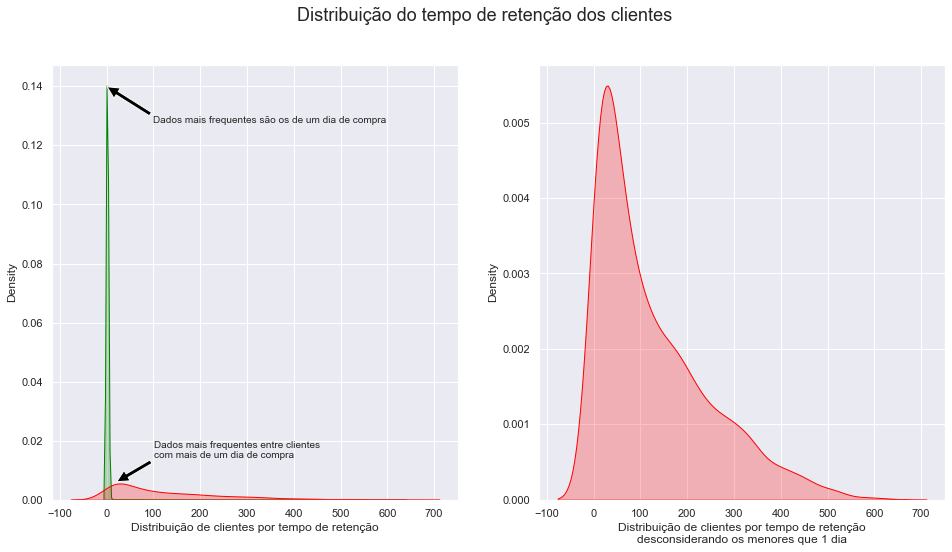

In [27]:
fig = plt.figure(figsize=(16, 8))
fig.suptitle('Distribuição do tempo de retenção dos clientes', fontsize=18)

top = p2.time.dt.days.value_counts().nlargest(1).index[0]

plt.subplot(1, 2, 1,)
sns.kdeplot(p2.time.dt.days, palette=sns.palettes.light_palette, shade=True, color='Green')
sns.kdeplot(p2.time[p2.time > timedelta(days=2)].dt.days, shade=True, color='Red')
plt.annotate(
    'Dados mais frequentes entre clientes\ncom mais de um dia de compra',
    (top+20, 0.006),
    arrowprops=dict(facecolor='black', shrink=0.01),
    xytext=(top+100, 0.02),
    horizontalalignment='left',
    verticalalignment='top'
)
plt.annotate(
    'Dados mais frequentes são os de um dia de compra',
    (0, 0.14),
    arrowprops=dict(facecolor='black', shrink=0.01),
    xytext=(100, 0.13),
    horizontalalignment='left',
    verticalalignment='top'
)
plt.xlabel('Distribuição de clientes por tempo de retenção')

plt.subplot(1, 2, 2)
sns.kdeplot(p2.time[p2.time > timedelta(days=2)].dt.days, shade=True, color='Red')
plt.xlabel('Distribuição de clientes por tempo de retenção\ndesconsiderando os menores que 1 dia')
plt.show()

In [28]:
dist = p2.time.dt.days.sort_values(ascending=False)
dist = pd.Series(np.where(dist == 1, dist.astype(str) + ' dia', dist.astype(str) + ' dias'))
((dist.value_counts().nlargest(4) / dist.value_counts().sum()).round(6) * 100).astype(str) + '%'

1 dia     97.8809%
6 dias     0.0314%
2 dias     0.0314%
3 dias     0.0272%
dtype: object

A visualização de dados acima nos permite enxergar com clareza como a quantidade de compras é feita em somente uma data específica, ou seja, baixa retenção dos clientes

Agora que compreendemos a composição dos dados que serão inseridos na nossa tabela X (variável explicativa), podemos prosseguir com esta união

In [29]:
Cliente = pd.merge(left=Cliente, right=p2[['customer_unique_id', 'time']], how='outer', on='customer_unique_id').sort_values('time', ascending=False)

### 3. Recência:

Usaremos a coluna "max" para, através da data da última compra, realizarmos a comparação com a data de hoje visando encontrar o tempo de ausência desde a última compra

In [30]:
p2['recencia'] = np.array([datetime.today() for _ in range(p2['max'].shape[0])], dtype=np.datetime64) - p2['max']
Cliente = pd.merge(left=Cliente, right=p2[['customer_unique_id', 'recencia']], how='outer', on='customer_unique_id').sort_values('time', ascending=False)

In [31]:
Cliente.columns = 'cliente quantia_comprada retencao recencia'.split()

In [32]:
Cliente

,cliente,quantia_comprada,retencao,recencia
0,32ea3bdedab835c3aa6cb68ce66565ef,3,633 days 02:01:14,1314 days 06:40:14.437282
1,ccafc1c3f270410521c3c6f3b249870f,2,608 days 23:29:38,1334 days 23:23:06.543230
2,d8f3c4f441a9b59a29f977df16724f38,2,582 days 20:44:41,1257 days 00:33:19.551707
3,94e5ea5a8c1bf546db2739673060c43f,2,580 days 16:38:23,1364 days 04:36:59.507146
4,87b3f231705783eb2217e25851c0a45d,2,572 days 16:29:03,1369 days 07:11:41.498407
...,...,...,...,...
33177,42c837a3d7df8cfa87de63fbc1aade2f,1,1 days 00:00:00,1288 days 05:02:12.455173
33176,42c81f944761257c8df3b028e6b738cd,1,1 days 00:00:00,1721 days 00:35:11.455173
33175,42c769ded134d534a9dedabd8f83c547,1,1 days 00:00:00,1424 days 22:57:54.455171
33174,42f296ed9782627fc7408a950975cfd2,1,1 days 00:00:00,1729 days 23:14:20.455227


<AxesSubplot:xlabel='recencia', ylabel='Density'>

Text(0.5, 0, 'Recência')

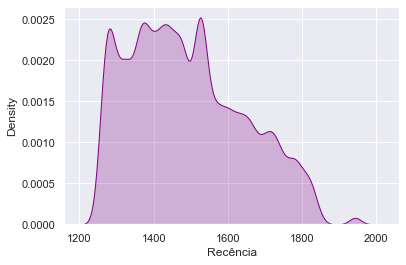

In [33]:
sns.kdeplot(Cliente.recencia.dt.days, shade=True, color='purple')
plt.xlabel('Recência')

### 4. Receita média:

Para encontrarmos a receita do total de compras feitas por cliente devemos realizar o agrupamento por cliente, soma-lo e anexa-lo na Tabela Cliente.

In [34]:
p1 = dados[0][['customer_unique_id', 'price', 'freight_value']].groupby('customer_unique_id', as_index=False).sum() #.groupby()

# MUDAR p1['receita_total_por_cliente'] PARA "p1.price" CASO A RECEITA NÃO DEVA CONSIDERAR O FRETE
# OU p1.rename({'price':'receita_total_por_cliente'}, axis=1) E DELETE A LINHA ABAIXO
p1['receita_total_por_cliente'] = p1.price + p1.freight_value
Cliente = pd.merge(left=Cliente, right=p1[['customer_unique_id', 'receita_total_por_cliente']], left_on='cliente', right_on='customer_unique_id', how='outer').drop(columns='customer_unique_id')

Agora seram formadas as duas últimas variáveis relacionadas a coluna da receita por cliente

In [35]:
Cliente['receita_media_por_quantia'] = Cliente['receita_total_por_cliente']/Cliente['quantia_comprada']
Cliente['receita_media_por_dia'] = Cliente['receita_total_por_cliente']/Cliente['retencao'].dt.days
Cliente.drop(columns='receita_total_por_cliente', inplace=True)
Cliente

,cliente,quantia_comprada,retencao,recencia,receita_media_por_quantia,receita_media_por_dia
0,32ea3bdedab835c3aa6cb68ce66565ef,3,633 days 02:01:14,1314 days 06:40:14.437282,45.720,0.216682
1,ccafc1c3f270410521c3c6f3b249870f,2,608 days 23:29:38,1334 days 23:23:06.543230,103.755,0.341299
2,d8f3c4f441a9b59a29f977df16724f38,2,582 days 20:44:41,1257 days 00:33:19.551707,79.255,0.272354
3,94e5ea5a8c1bf546db2739673060c43f,2,580 days 16:38:23,1364 days 04:36:59.507146,93.585,0.322707
4,87b3f231705783eb2217e25851c0a45d,2,572 days 16:29:03,1369 days 07:11:41.498407,261.560,0.914545
...,...,...,...,...,...,...
95415,42c837a3d7df8cfa87de63fbc1aade2f,1,1 days 00:00:00,1288 days 05:02:12.455173,98.900,98.900000
95416,42c81f944761257c8df3b028e6b738cd,1,1 days 00:00:00,1721 days 00:35:11.455173,76.620,76.620000
95417,42c769ded134d534a9dedabd8f83c547,1,1 days 00:00:00,1424 days 22:57:54.455171,37.030,37.030000
95418,42f296ed9782627fc7408a950975cfd2,1,1 days 00:00:00,1729 days 23:14:20.455227,86.150,86.150000


<Figure size 1152x576 with 0 Axes>

Text(25.125, 0.5, 'Receita média por quantidade')

<Figure size 1152x576 with 0 Axes>

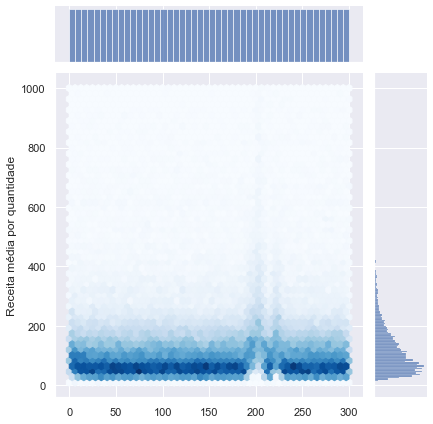

In [36]:
plt.figure(figsize=(16, 8))
demo = Cliente[Cliente['receita_media_por_quantia'] < 1000]
sns.jointplot(y='receita_media_por_quantia', x=np.linspace(0,300,demo.shape[0]), data=demo, kind="hex", cmap="Blues")
plt.ylabel('Receita média por quantidade')

Podemos observar a concentração de valores entre 0 e 200 de maneira significativamente relevante, devemos nos atentar para esse detalhe na etapa de machine learning

In [37]:
X = Cliente.drop(columns='cliente')
X['retencao'] = X.retencao.dt.days
X['recencia'] = X.recencia.dt.days

# Preprocessamento

In [38]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

#### Mudar etapa abaixo caso mude de receita_media_por_dia para receita_media_por_quantia

In [39]:
X.drop('receita_media_por_dia', axis=1, inplace=True)
X

,quantia_comprada,retencao,recencia,receita_media_por_quantia
0,3,633,1314,45.720
1,2,608,1334,103.755
2,2,582,1257,79.255
3,2,580,1364,93.585
4,2,572,1369,261.560
...,...,...,...,...
95415,1,1,1288,98.900
95416,1,1,1721,76.620
95417,1,1,1424,37.030
95418,1,1,1729,86.150


MinMaxScaler dimensiona todos os recursos de dados no intervalo [0, 1] ou então no intervalo [-1, 1] se houver valores negativos no conjunto de dados. Na presença de outliers, o StandardScaler não garante escalas de recursos balanceadas, devido à influência dos outliers ao calcular a média empírica e o desvio padrão. Isso leva à redução na faixa dos valores do recurso. 

https://sigmoidal.ai/guia-basico-de-pre-processamento-de-dados/

In [40]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)
scaled_data = pd.DataFrame(scaled_data)
scaled_data.columns = X.columns
scaled_data.sort_values('receita_media_por_quantia', ascending=False)

,quantia_comprada,retencao,recencia,receita_media_por_quantia
64677,0.0,0.0,0.465659,1.000000
64608,0.0,0.0,0.068681,0.532081
29904,0.0,0.0,0.778846,0.506772
90606,0.0,0.0,0.054945,0.506253
33951,0.0,0.0,0.641484,0.491931
...,...,...,...,...
80715,0.0,0.0,0.502747,0.000149
57662,0.0,0.0,0.423077,0.000149
9310,0.0,0.0,0.100275,0.000095
40982,0.0,0.0,0.486264,0.000035


### Explicação do Kmeans:
k-means é um método de segregar em torno de centros (centroides) diversos dados, criando o que analogamente na química chamamos de clustering que gera o efeito de particionar n observações dentre k grupos onde cada observação pertence ao grupo mais próximo da média.
https://pt.wikipedia.org/wiki/K-means

In [41]:
palette = ['#e41a1c', '#377eb8', '#4daf4a']

In [42]:
km = KMeans(n_clusters=3, random_state=0).fit(scaled_data)
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([36899, 22403, 36118]))

In [43]:
clustered = pd.concat([Cliente['cliente'], scaled_data, pd.Series(km.predict(scaled_data))], axis=1, ignore_index=True)
cols = ['cliente', 'quantia_comprada', 'retencao', 'recencia', 'receita_media_por_quantia', 'grupo']
clustered.columns = cols

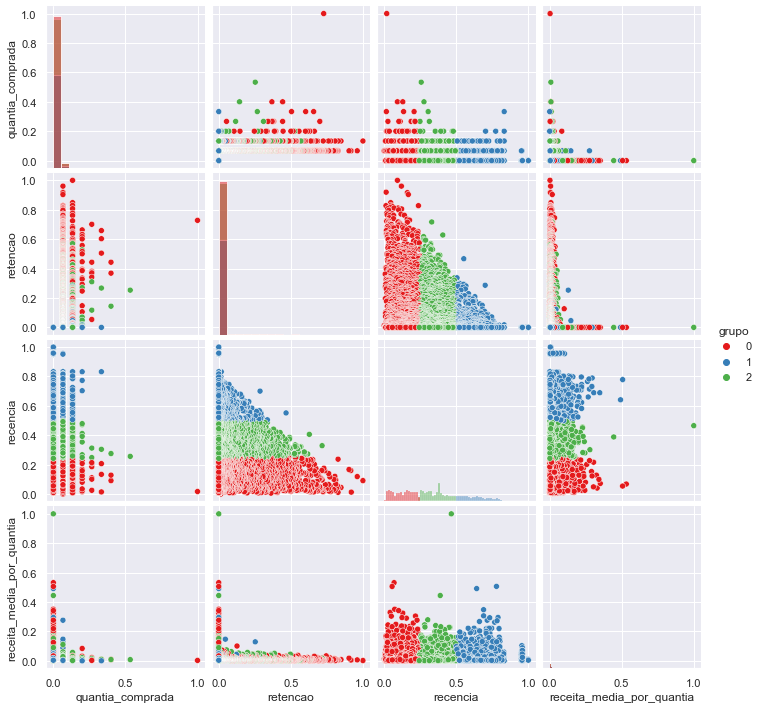

In [44]:
sns.pairplot(clustered, hue='grupo', diag_kind="hist", palette=palette)
plt.show()

Podemos observar através dos dados que os valores gerados são relativamente bem comportados, entretanto existe uma dificuldade de tornar a receita média relevante devido a concentração na média que os dados tem

In [45]:
clustered.sort_values(['retencao', 'receita_media_por_quantia'], ascending=False).head(10).style.background_gradient(subset=['receita_media_por_quantia', 'recencia', 'retencao'], cmap='Blues')

,cliente,quantia_comprada,retencao,recencia,receita_media_por_quantia,grupo
0,32ea3bdedab835c3aa6cb68ce66565ef,0.133333,1.000000,0.092033,0.002646,0
1,ccafc1c3f270410521c3c6f3b249870f,0.066667,0.960443,0.119505,0.006896,0
2,d8f3c4f441a9b59a29f977df16724f38,0.066667,0.919304,0.013736,0.005102,0
3,94e5ea5a8c1bf546db2739673060c43f,0.066667,0.916139,0.160714,0.006151,0
4,87b3f231705783eb2217e25851c0a45d,0.066667,0.903481,0.167582,0.018453,0
5,8f6ce2295bdbec03cd50e34b4bd7ba0a,0.133333,0.848101,0.045330,0.009185,0
6,30b782a79466007756f170cb5bd6bbd8,0.133333,0.829114,0.046703,0.004638,0
7,4e23e1826902ec9f208e8cc61329b494,0.066667,0.827532,0.237637,0.006173,0
8,a1c61f8566347ec44ea37d22854634a1,0.066667,0.827532,0.012363,0.004588,0
9,a262442e3ab89611b44877c7aaf77468,0.066667,0.822785,0.056319,0.005809,0


In [46]:
clustered.sort_values(['receita_media_por_quantia'], ascending=False).head(10).style.background_gradient(subset=['receita_media_por_quantia', 'recencia', 'retencao'], cmap='Blues')

,cliente,quantia_comprada,retencao,recencia,receita_media_por_quantia,grupo
64677,0a0a92112bd4c708ca5fde585afaa872,0.000000,0.000000,0.465659,1.000000,2
64608,763c8b1c9c68a0229c42c9fc6f662b93,0.000000,0.000000,0.068681,0.532081,0
29904,dc4802a71eae9be1dd28f5d788ceb526,0.000000,0.000000,0.778846,0.506772,1
90606,459bef486812aa25204be022145caa62,0.000000,0.000000,0.054945,0.506253,0
33951,ff4159b92c40ebe40454e3e6a7c35ed6,0.000000,0.000000,0.641484,0.491931,1
64188,4007669dec559734d6f53e029e360987,0.000000,0.000000,0.388736,0.444685,2
63174,5d0a2980b292d049061542014e8960bf,0.000000,0.000000,0.072802,0.351522,0
35498,eebb5dda148d3893cdaf5b5ca3040ccb,0.000000,0.000000,0.689560,0.348219,1
89762,48e1ac109decbb87765a3eade6854098,0.000000,0.000000,0.100275,0.342172,0
27991,edde2314c6c30e864a128ac95d6b2112,0.000000,0.000000,0.041209,0.329835,0


As tabelas acima visam nos auxiliar em observar o quanto o modelo consegue comportar bem os maiores clientes
na receita média e na recência.

### MinMaxScaler + PCA com 2 variáveis + Kmeans

O PCA (principal component analysis) visa encontrar um meio de condensar a informação contida em várias variáveis originais em um conjunto menor de variáveis estatísticas (componentes) com uma perda mínima de informação.

O número de componentes principais se torna o número de variáveis consideradas na análise, mas geralmente as primeiras componentes são as mais importantes já que explicam a maior parte da variação total.

As componentes principais em geral são extraídas via matriz de covariância, mas também podem ser extraídas via matriz de correlação.
https://operdata.com.br/blog/analise-de-componentes-principais/

In [48]:
pca2 = PCA(n_components=2, random_state=0)
pca2 = pca2.fit_transform(scaled_data)

p2 = pd.DataFrame(pca2)

km2 = KMeans(n_clusters=3, random_state=0).fit(p2)
np.unique(km2.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([36899, 36118, 22403]))

In [49]:
print(np.unique(km.labels_, return_counts=True),
np.unique(km2.labels_, return_counts=True), sep='\n')

(array([0, 1, 2], dtype=int32), array([36899, 22403, 36118]))
(array([0, 1, 2], dtype=int32), array([36899, 36118, 22403]))


In [50]:
clustered2 = pd.concat([Cliente['cliente'], p2, pd.Series(km2.predict(p2))], axis=1, ignore_index=True)
cols = ['cliente', 'var_1', 'var_2', 'grupo']
clustered2.columns = cols

<AxesSubplot:xlabel='var_1', ylabel='var_2'>

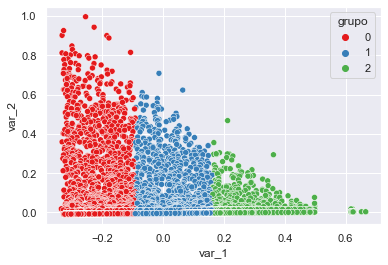

In [52]:
sns.scatterplot(x='var_1', y='var_2', hue='grupo', data=clustered2, palette=palette)
plt.show()

O atual modelo não demonstra muitas fraquezas enquanto observado no gráfico,
a principal fraqueza do PCA está intrínseca a ele, o fato de que ele gera eixos que não podemos explicar
usando o conhecimento dos dados.

In [53]:
Cliente[['cliente', 'receita_media_por_dia']].sort_values(by='receita_media_por_dia', ascending=False)

,cliente,receita_media_por_dia
64677,0a0a92112bd4c708ca5fde585afaa872,13664.080000
2327,da122df9eeddfedc1dc1f5349a1a690c,7571.630000
64608,763c8b1c9c68a0229c42c9fc6f662b93,7274.880000
29904,dc4802a71eae9be1dd28f5d788ceb526,6929.310000
90606,459bef486812aa25204be022145caa62,6922.210000
...,...,...
0,32ea3bdedab835c3aa6cb68ce66565ef,0.216682
105,efd22f5f8fc7e5035a4f48bd92c0c69c,0.192869
76,c04a6c1c190e47ec62b4bb139921331a,0.173216
45,a4030b5e97ffc14114e66d82df860f6f,0.152877


In [54]:
clustered2.sort_values(['var_2', 'var_1'], ascending=False).head(10).style.background_gradient(subset=['var_2', 'var_1'], cmap='Blues')

,cliente,var_1,var_2,grupo
0,32ea3bdedab835c3aa6cb68ce66565ef,-0.254458,0.996651,0
1,ccafc1c3f270410521c3c6f3b249870f,-0.226394,0.943396,0
28,8d50f5eadf50201ccdcedfb9e2ac8455,-0.326663,0.926218,0
2,d8f3c4f441a9b59a29f977df16724f38,-0.331648,0.902022,0
3,94e5ea5a8c1bf546db2739673060c43f,-0.184643,0.900751,0
4,87b3f231705783eb2217e25851c0a45d,-0.177619,0.888458,0
5,8f6ce2295bdbec03cd50e34b4bd7ba0a,-0.299287,0.848083,0
6,30b782a79466007756f170cb5bd6bbd8,-0.297680,0.829621,0
7,4e23e1826902ec9f208e8cc61329b494,-0.106635,0.815387,0
8,a1c61f8566347ec44ea37d22854634a1,-0.331892,0.812610,0


In [55]:
clustered2.sort_values(['var_1'], ascending=False).head(10).style.background_gradient(subset=['var_1', 'var_2'], cmap='Blues')

,cliente,var_1,var_2,grupo
69965,b7d76e111c89f7ebf14761390f0f7d17,0.665961,0.003635,2
89949,4854e9b3feff728c13ee5fc7d1547e92,0.665961,0.003652,2
66030,830d5b7aaa3b6f1e9ad63703bec97d23,0.652226,0.003464,2
53730,0eb1ee9dba87f5b36b4613a65074337c,0.627503,0.003168,2
87263,2f64e403852e6893ae37485d5fcacdaf,0.627503,0.003187,2
90608,45d9410bc1f3c6e36dea41d8f823ada6,0.626131,0.002998,2
56842,2ad10f49ef1f061d5f6739c89d3ade68,0.626130,0.003070,2
21327,8d36e7e56a9f8044df728e9cbf5a3eaf,0.626130,0.003092,2
57780,28706b8dc0fe2a95fbcec1e53253d8e4,0.626130,0.003104,2
53116,0829f7df6577d5a4b65439bea701405f,0.626130,0.003107,2


In [56]:
clustered2[clustered2.cliente == '0a0a92112bd4c708ca5fde585afaa872']

,cliente,var_1,var_2,grupo
64677,0a0a92112bd4c708ca5fde585afaa872,0.131698,-0.006727,1


In [57]:
clustered2.drop(columns='grupo').corr().style.background_gradient()

,var_1,var_2
var_1,1.000000,-0.000000
var_2,-0.000000,1.000000


Dedução do comportamento dos dados:
As variáveis que caminham em direção oposta como: recencia e receita; gerando assim uma aparência de tradeoff nas variáveis

### PCA com 3 variáveis

In [58]:
pca3 = PCA(n_components=3, random_state=0)
pca3 = pca3.fit_transform(scaled_data)

p3 = pd.DataFrame(pca3)

km3 = KMeans(n_clusters=3, random_state=0).fit(p3)
np.unique(km3.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([22403, 36899, 36118]))

In [59]:
clustered3 = pd.concat([Cliente['cliente'], p3, pd.Series(km3.predict(p3))], axis=1, ignore_index=True)
cols = ['cliente', 'var_1', 'var_2', 'var_3', 'grupo']
clustered3.columns = cols

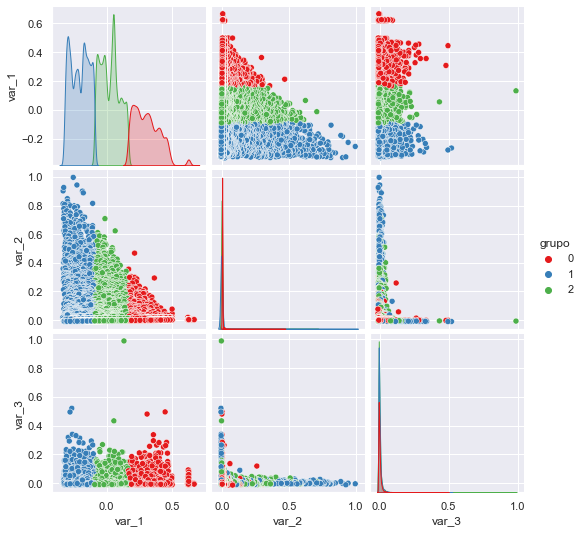

In [60]:
sns.pairplot(clustered3, hue='grupo', palette=palette); plt.show()

Os dados gerados colocam duas variáveis extremamente relevantes e uma não, ou seja, não gera aparentemente nenhum ganho em relação ao PCA com duas variáveis

#### Análise a partir da métrica de Elbow

Na análise de cluster, o método Elbow é uma heurística usada para determinar o número de clusters em um conjunto de dados. O método consiste em plotar a variação explicada em função do número de clusters e escolher o "cotovelo" da curva como o número de clusters a utilizar.
https://en.wikipedia.org/wiki/Elbow_method_(clustering)

Diferenças Marginalmente irrelevantes perante as conclusões do método Elbow

In [61]:
i = tuple(range(2,14))
k_elbow1 = [KMeans(n_clusters=clust, random_state=0).fit(scaled_data).inertia_ for clust in i]
k_elbow2 = [KMeans(n_clusters=clust, random_state=0).fit(p2).inertia_ for clust in i]
k_elbow3 = [KMeans(n_clusters=clust, random_state=0).fit(p3).inertia_ for clust in i]

#### Ausência de diferença entre resultados a partir da metrica de Elbow

Text(0.5, 0, 'Número de clusters')

Text(0, 0.5, 'Variância explicada')

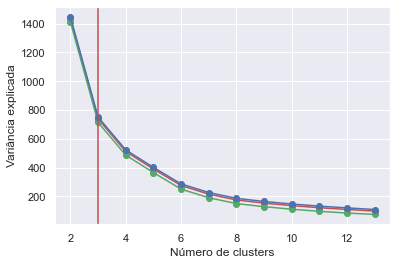

In [62]:
plt.plot(i, k_elbow3, 'o-r')
plt.plot(i, k_elbow2, 'o-g')
plt.plot(i, k_elbow1, 'o-b')
plt.axvline(3, 0, 800, color='r',)
plt.xlabel('Número de clusters')
plt.ylabel('Variância explicada')
plt.savefig('clusters.png')
plt.show()

Este gráfico ilustra como a variância é explicada na medida que se aumenta o número de clusters,
marcado com a linha vermelha está o número de clusters que escolhemos (3) e sua efetividade.

# Usando modelo AGGLOMERATIVE CLUSTERING

**Métrica** usada para calcular a vinculação. Pode ser "euclidean", "l1", "l2",
"manhattan", "cosine", ou "precomputed".
Se o linkage escolhido é "ward", somente o método "euclidean" é aceito.
Se "precomputed", a matriz da distância (ao invés da matriz de similaridade)
é necessário como entrada para o método de ajuste.

----

**Linkage** : {'ward', 'complete', 'average', 'single'}, padrão='ward'
    Qual critério de ligação usar. O critério de ligação determina qual
distância a ser usada entre conjuntos de observação. O algoritmo irá mesclar
os pares de cluster que minimizam este critério

'ward' minimiza a variação dos clusters que estão sendo mesclados.

'average' usa a média das distâncias de cada observação de
os dois conjuntos.

'complete' ou 'maximum' ligação usa as distâncias máximas entre
todas as observações dos dois conjuntos.

'single' usa o mínimo das distâncias entre todas as observações
dos dois conjuntos.

In [63]:
np.random.seed(0)
sample = scaled_data.sample(20000)

In [64]:
def model_agg(X, lk, metric='euclidean'):
    global sample
    model = AgglomerativeClustering(n_clusters=3, linkage=lk, affinity=metric)
    result = model.fit_predict(sample)
    return result, model

In [65]:
%%time
data, model = model_agg(scaled_data, 'ward')
final = pd.concat([sample.reset_index(drop=True), pd.Series(data)], axis=1, ignore_index=True)
final.columns = list(X.columns) + ['grupo']

CPU times: user 15.2 s, sys: 5.66 s, total: 20.8 s
Wall time: 31.3 s


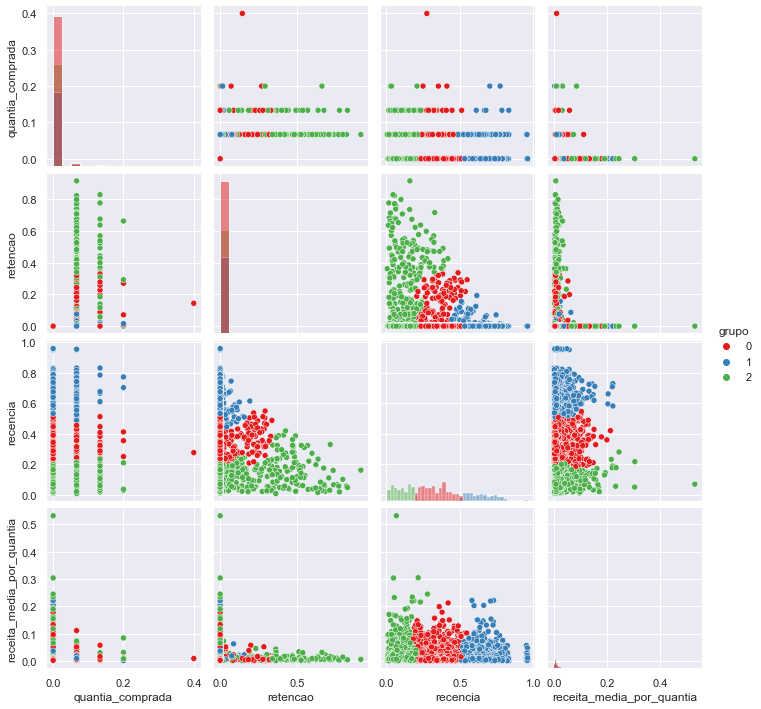

In [66]:
sns.pairplot(final, hue='grupo', diag_kind='hist', palette=palette)
plt.show()

o comportamento demonstrado por esse modelo parece dar um pouco mais de poder para a receita, devemos considerar, porém, que pode ser derivado da seleção amostral.

In [67]:
final['grupo'].value_counts(normalize=True)

0    0.45610
2    0.31735
1    0.22655
Name: grupo, dtype: float64

In [68]:
%%time
data, model = model_agg(scaled_data, 'complete', metric='euclidean')
final2 = pd.concat([sample.reset_index(drop=True), pd.Series(data)], axis=1, ignore_index=True)
final2.columns = list(X.columns) + ['grupo']

CPU times: user 17.4 s, sys: 3.84 s, total: 21.2 s
Wall time: 21.7 s


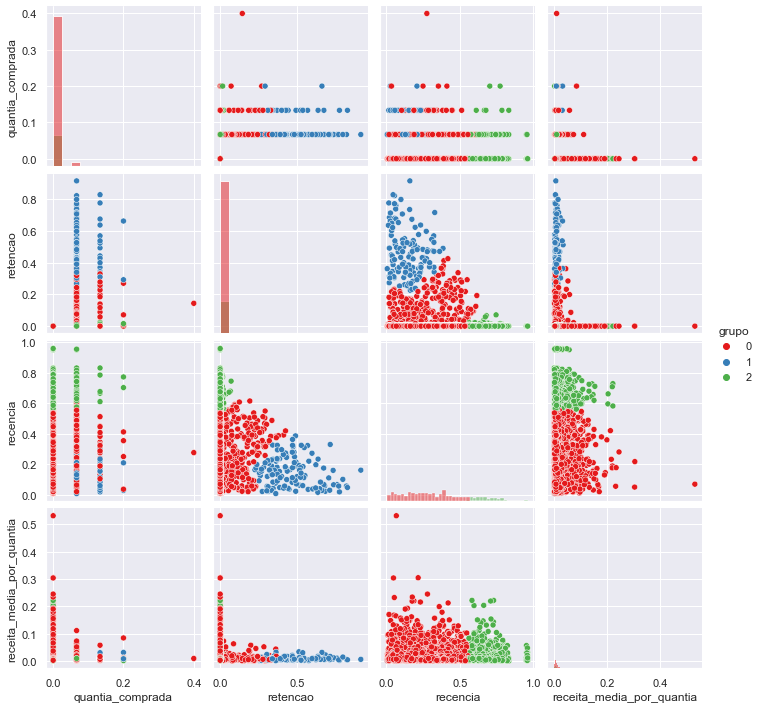

In [69]:
sns.pairplot(final2, hue='grupo', diag_kind='hist', palette=palette)
plt.show()

Este modelo gera uma relevância na receita média mas uma contradição entre os grupos, como pode o grupo de maior receita média (grupo 0) ser o de pior retenção, como se fosse o ouro.

In [71]:
final2['grupo'].value_counts(normalize=True)

0    0.8218
2    0.1722
1    0.0060
Name: grupo, dtype: float64

In [72]:
%%time

data, model = model_agg(scaled_data, 'complete', metric='cosine')
final3 = pd.concat([sample.reset_index(drop=True), pd.Series(data)], axis=1, ignore_index=True)
final3.columns = list(X.columns) + ['grupo']

CPU times: user 17.5 s, sys: 4.49 s, total: 22 s
Wall time: 23.5 s


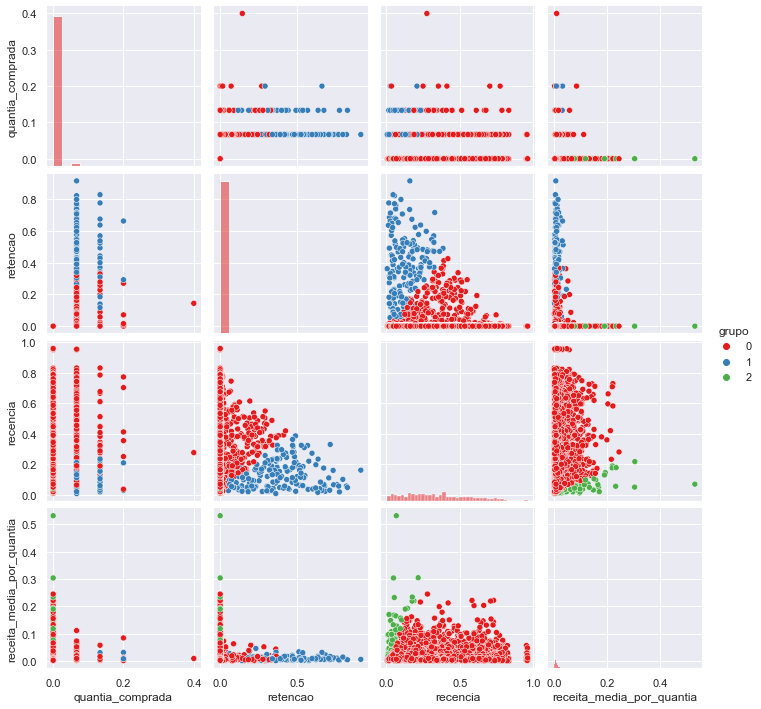

In [73]:
sns.pairplot(final3, hue='grupo', diag_kind='hist', palette=palette)
plt.show()

In [74]:
final3['grupo'].value_counts(normalize=True)

0    0.98690
1    0.00795
2    0.00515
Name: grupo, dtype: float64

In [75]:
%%time
result, model = model_agg(scaled_data, 'single')
final4 = pd.concat([sample.reset_index(drop=True), pd.Series(data)], axis=1, ignore_index=True)
final4.columns = list(X.columns) + ['grupo']

CPU times: user 3.37 s, sys: 6.46 ms, total: 3.37 s
Wall time: 3.37 s


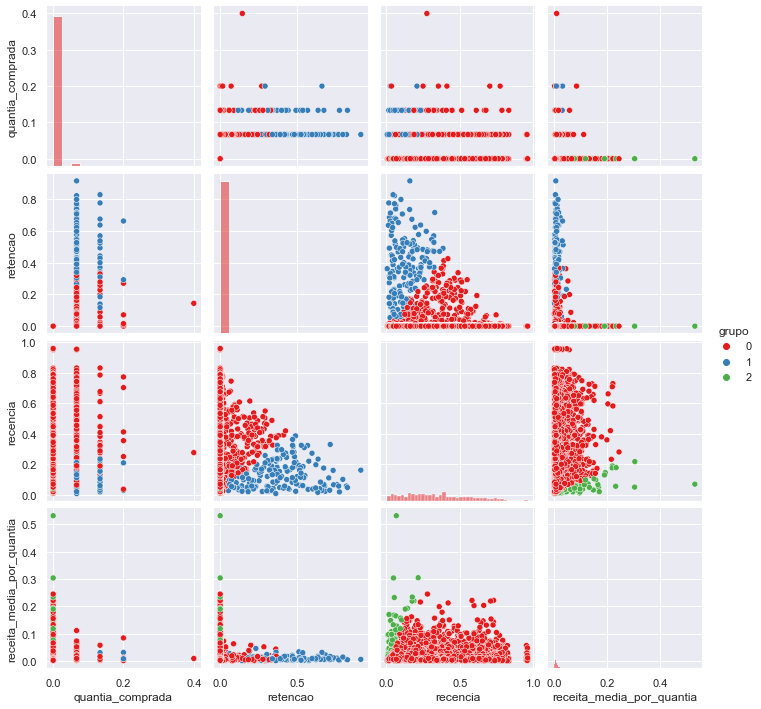

In [76]:
sns.pairplot(final4, hue='grupo', diag_kind='hist', palette=palette)
plt.show()

Este modelo trás defeitos semelhantes do que o anterior mas cria também uma espécie de tradeoff entre o grupo 1 e 2, uma incoerência dado que você pode "subir" de um grupo para o outro como se fosse uma escada e não pode escolher um grupo o outro como se fossem dois caminhos divergentes

In [77]:
final4['grupo'].value_counts(normalize=True)

0    0.98690
1    0.00795
2    0.00515
Name: grupo, dtype: float64

Percebe-se um frequente erro entre os modelos, o grande volume de clientes na posição zero que geralmente aparenta ser o ouro (que deveria ter uma dificuldade maior em se chegar). Portanto, vamos trabalhar em cima do modelo mais sensato dentre o que encontramos, o de linkage='ward', para minar suas limitações e melhorar seu pontos fortes

## Complementando modelo com random forest:

Usaremos o RandomForest para aprender o comportamento do modelo gerado acima e reproduzi-lo sobre todo o data set, permitindo assim que se expanda suas características analisadas por todo o modelo e possamos tratar o critério para se tornar ouro, prata ou bronze

In [168]:
step = pd.concat([pd.Series(sample.index), final.grupo], ignore_index=True, axis=1).set_index(0)

In [151]:
rfr = RandomForestClassifier(n_jobs=-1, random_state=0, max_depth=3)

xtrain, xtest, ytrain, ytest = train_test_split(final.drop(columns='grupo'), final['grupo'], test_size=0.35, random_state=0, stratify=final['grupo'])
rfr.fit(sample, step.to_numpy().ravel())

RandomForestClassifier(max_depth=3, n_jobs=-1, random_state=0)

Observemos a distribuição dos valores preditos

<AxesSubplot:ylabel='Frequency'>

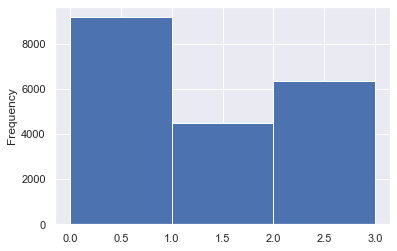

In [171]:
pd.Series(rfr.predict(sample)).plot(kind='hist', bins=[0, 1, 2, 3])

Queremos agora tratar o problema do número elevado zeros aumentando seu critério

In [172]:
prob_and_class = pd.concat([pd.DataFrame(rfr.predict_proba(scaled_data)), pd.Series(rfr.predict(scaled_data))], axis=1, ignore_index=True)

In [179]:
pd.Series(rfr.predict(scaled_data)).value_counts()

0    43848
2    30406
1    21166
dtype: int64

In [209]:
%%time
classes = []
for each in prob_and_class.iloc[:, 0:-1].iterrows():
    classes.append(0 if each[1].max() == each[1][2] and each[1][2] > 0.9 else (1 if each[1][1] > each[1][0] else 2))

CPU times: user 9.58 s, sys: 9.6 ms, total: 9.59 s
Wall time: 9.68 s


CONSERTAR CELULA ABAIXO (IMPORTANTE)

In [ ]:
# class_new_threshold = np.vectorize(lambda x, y, z: 0 if (x > .93) and (x > y) and (x > z) else (1 if y > z and y > x else 2))
# result_new_threshold = class_new_threshold(prob_and_class[0], prob_and_class[1], prob_and_class[2])

In [230]:
func = np.vectorize(lambda x, y, z: 0 if x > 0.93 and x > y and x > z else (1 if y > z else 2))
pd.Series(func(prob_and_class.iloc[:, 0], prob_and_class.iloc[:, 1], prob_and_class.iloc[:, 2])).value_counts()

1    64640
2    30780
dtype: int64

In [210]:
df_new_threshold = pd.concat([scaled_data, pd.Series(np.array(classes))], axis=1).rename({0:'grupo'}, axis=1)

In [211]:
df_new_threshold.grupo.value_counts(normalize=True)

2    0.646269
1    0.221819
0    0.131912
Name: grupo, dtype: float64

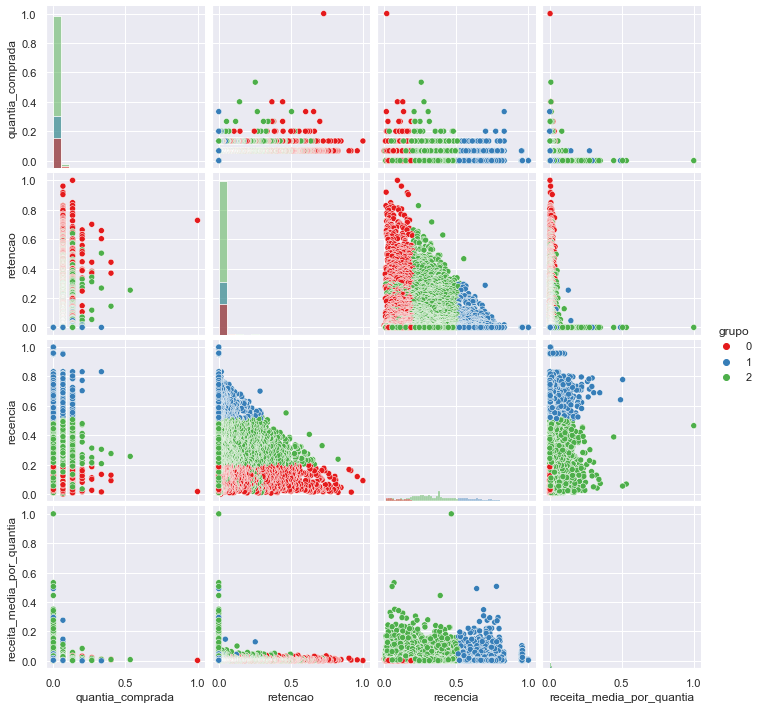

In [213]:
sns.pairplot(df_new_threshold, hue='grupo', diag_kind='hist', palette=['#e41a1c', '#377eb8', '#4daf4a'])

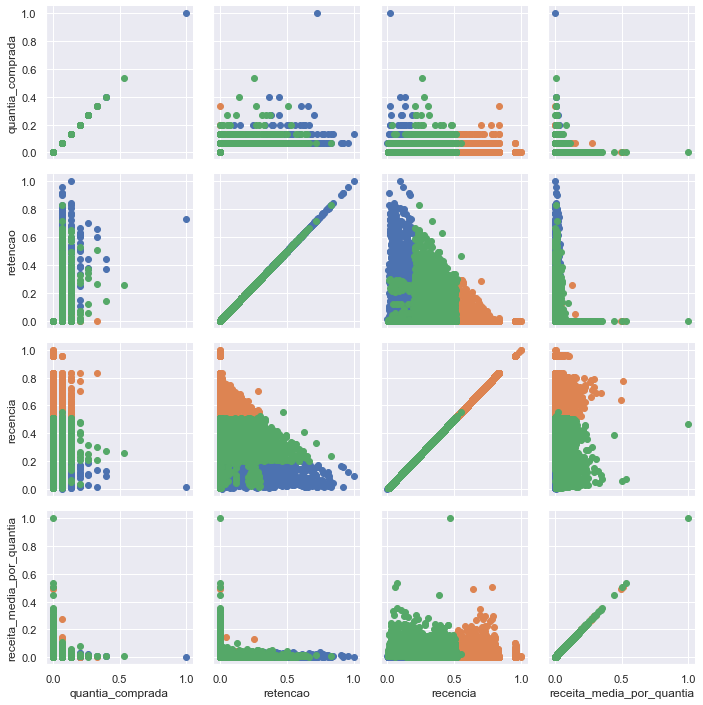

In [214]:
sns.PairGrid(df_new_threshold, hue='grupo').map(plt.scatter)

<AxesSubplot:xlabel='receita_media_por_quantia', ylabel='recencia'>

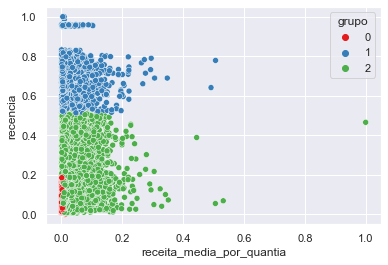

In [215]:
sns.scatterplot(data=df_new_threshold[['recencia', 'receita_media_por_quantia', 'grupo']], x='receita_media_por_quantia', y='recencia', hue='grupo', palette=palette)

In [216]:
dataFrame = pd.concat([X, df_new_threshold['grupo']], axis=1)
dataFrame = dataFrame.astype({'grupo':int}).astype({'grupo':'category'})

#### DESCREVER SEGUNDA ALTERNATIVA

In [217]:
## Dataset + agrupamentos final

dataFrame['grupo'] = np.select(
    [
        dataFrame['grupo'] == 0,
        dataFrame['grupo'] == 1,
        dataFrame['grupo'] == 2,
    ],
    [
        'ouro',
        'bronze',
        'prata'
    ]
)

In [218]:
dataFrame

,quantia_comprada,retencao,recencia,receita_media_por_quantia,grupo
0,3,633,1314,45.720,ouro
1,2,608,1334,103.755,ouro
2,2,582,1257,79.255,ouro
3,2,580,1364,93.585,ouro
4,2,572,1369,261.560,ouro
...,...,...,...,...,...
95415,1,1,1288,98.900,prata
95416,1,1,1721,76.620,bronze
95417,1,1,1424,37.030,prata
95418,1,1,1729,86.150,bronze


In [ ]:
# dataFrame.to_csv('df.csv', index=None)